In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

style.use('ggplot')


In [138]:
df = pd.read_csv('Runs_Data.csv', index_col=0)

In [139]:
df.index = pd.to_datetime(df.index)

In [140]:
df.columns.values

array(['Calories (kcal)', 'Distance (m)', 'Average speed (m/s)',
       'Max speed (m/s)', 'Min speed (m/s)', 'Step count',
       'Move Minutes count', 'Inactive duration (ms)',
       'Walking duration (ms)', 'Running duration (ms)'], dtype=object)

In [154]:
df['2019'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2019-01-03 to 2019-12-17
Data columns (total 10 columns):
Calories (kcal)           29 non-null float64
Distance (m)              29 non-null float64
Average speed (m/s)       29 non-null float64
Max speed (m/s)           29 non-null float64
Min speed (m/s)           29 non-null float64
Step count                29 non-null int64
Move Minutes count        29 non-null float64
Inactive duration (ms)    29 non-null int64
Walking duration (ms)     29 non-null float64
Running duration (ms)     29 non-null float64
dtypes: float64(8), int64(2)
memory usage: 2.5 KB


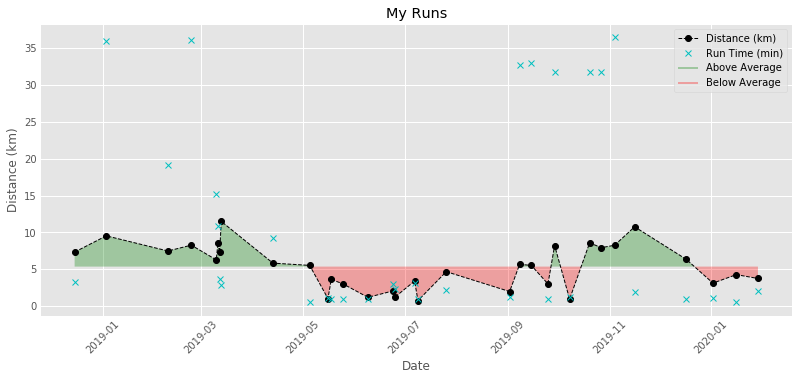

In [153]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(111)

ax1.plot_date(df.index, 
         df['Distance (m)']/1000, 
         label = 'Distance (km)', 
         color='k', 
         marker='o',
         linestyle='--',
         linewidth=1)

ax1.plot_date(df.index, 
         (df['Running duration (ms)']/1000)/60, 
         label = 'Run Time (min)', 
         color='c', 
         marker='x',
         linestyle='none',
         linewidth=1)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

ax1.fill_between(df.index, 
                 df['Distance (m)']/1000,  
                 df['Distance (m)'].mean()/1000, 
                 where= df['Distance (m)']/1000 >= df['Distance (m)'].mean()/1000,
                 interpolate=True,
                 facecolor='g',
                 alpha=0.3)

ax1.fill_between(df.index, 
                 df['Distance (m)']/1000,  
                 df['Distance (m)'].mean()/1000, 
                 where= df['Distance (m)']/1000 < df['Distance (m)'].mean()/1000,
                 interpolate=True,
                 facecolor='r',
                 alpha=0.3)

ax1.plot([],[],linewidth=2, label='Above Average', color='g', alpha=0.3)
ax1.plot([],[],linewidth=2, label='Below Average', color='r', alpha=0.3)


plt.title('My Runs')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.legend()

In [127]:
df.head()

,Calories (kcal),Distance (m),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Move Minutes count,Inactive duration (ms),Walking duration (ms),Running duration (ms)
Date,,,,,,,,,,
2018-12-15,2495.012479,7335.794295,0.712296,1.842943,0.251058,13776,190.0,70572251,12836239.0,193954.0
2019-01-03,2478.029112,9539.265057,0.703205,2.820402,0.254904,13766,135.0,74449719,6833478.0,2155073.0
2019-02-09,2464.006397,7484.317879,0.625154,2.950000,0.262964,14060,172.0,73968473,10568275.0,1148210.0
2019-02-23,2415.538956,8275.506110,0.666881,1.839166,0.248740,15001,169.0,75678519,7152954.0,2168364.0
2019-03-10,2269.320555,6284.966000,1.077804,4.050000,0.248899,11638,136.0,74879804,7778526.0,915039.0
